In [56]:
import xarray as xr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

adir_adcp = 'F:/data/cruise_data/saildrone/baja-2018/adcp_data/'
adir = 'F:/data/cruise_data/saildrone/baja-2018/'

filename_adcp = adir_adcp + 'saildrone-gen_4-baja_2018-sd1002-adcp-20180411T175730-20180611T235730_300s-v1.nc'
filename_10min=adir + 'saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-10_minutes-v1_withloggers_matchedadcp.nc'

ds_usv = xr.open_dataset(filename_10min)  #1 minute averaging
ds_adcp = xr.open_dataset(filename_adcp)            #10 minute sampling


In [57]:
lower_time=np.datetime64('2018-04-20')
upper_time=np.datetime64('2018-04-21')
ds_adcp2=ds_adcp.where((ds_adcp.time>lower_time) & (ds_adcp.time<=upper_time))


In [58]:
ds_adcp.time[6046].data
#ds_adcp.longitude

array(['2018-05-23T23:57:27.239997952'], dtype='datetime64[ns]')

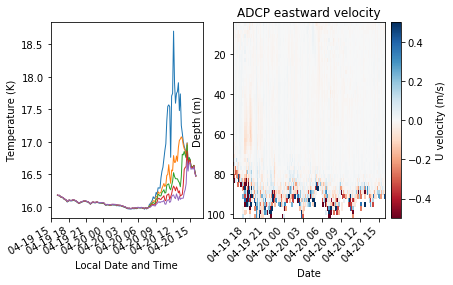

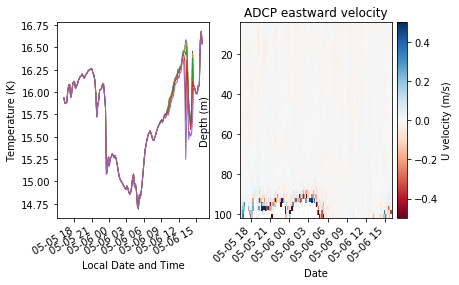

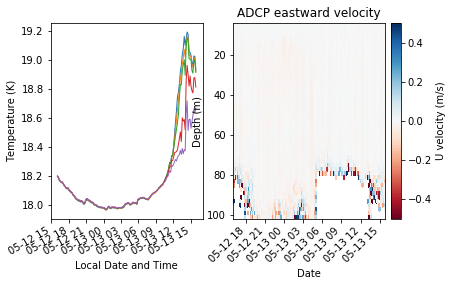

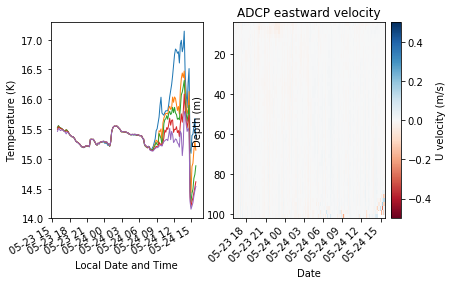

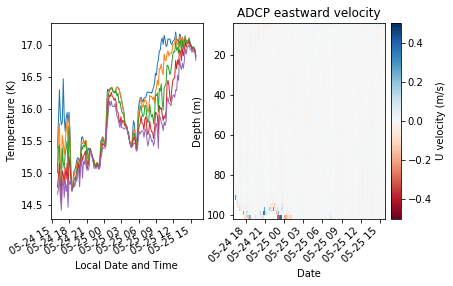

In [95]:
#make plots of times with diurnal warming, PLOT LOCAL TIME
time_offset_to_lmt=(ds_adcp.longitude[:,0]/360.)*24.*60.*60.
tlmt= ds_adcp.time[:,0]+time_offset_to_lmt* dt.timedelta(seconds=1)
i1save=[1150,3454,4462,6046,6190]
i2save=[1294,3598,4606,6190,6334]
file_str=['p1','p2','p3','p4','p5','p6','p7']
ilen=len(i1save)
for ii in range(0,ilen):
    i1=i1save[ii]
    i2=i2save[ii]
#    t=ds.TIME[0,:].isel(obs=slice(i1,i2)) #UTC time
    t=tlmt.isel(obs=slice(i1,i2)) #local time
    ydepth=ds_adcp.cell_depth #local time
    s0=ds_usv.TEMP_CTD_MEAN.isel(obs=slice(i1,i2))
    s1=ds_usv.sea_water_temperature_logger1_mean.isel(obs=slice(i1,i2))#-273.15
    s2=ds_usv.sea_water_temperature_logger2_mean.isel(obs=slice(i1,i2))#-273.15
    s3=ds_usv.sea_water_temperature_logger3_mean.isel(obs=slice(i1,i2))#-273.15
    s4=ds_usv.sea_water_temperature_logger4_mean.isel(obs=slice(i1,i2))#-273.15
    v0=ds_adcp.vel_up.isel(obs=slice(i1,i2))
    s0mask = np.isfinite(s0)
    s1mask = np.isfinite(s1)
    s2mask = np.isfinite(s2)
    s3mask = np.isfinite(s3)
    s4mask = np.isfinite(s4)

 #   fig, ax = plt.subplots(2, 1, 1)
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot_date(t[s1mask], s1[s1mask],'-',markersize=.5,lw=1)
    ax1.plot_date(t[s0mask], s0[s0mask],'-',markersize=.5,lw=1)
    ax1.plot_date(t[s2mask], s2[s2mask],'-',markersize=.5,lw=1)
    ax1.plot_date(t[s3mask], s3[s3mask],'-',markersize=.5,lw=1)
    ax1.plot_date(t[s4mask], s4[s4mask],'-',markersize=.5,lw=1)
    ax1.set(xlabel='Local Date and Time', ylabel='Temperature (K)')
    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    #ax.fmt_xdata = t.DateFormatter('%Y-%m-%d')
    #tem=str(ds_usv.TEMP_CTD_MEAN.installed_height)+' m'
    #ax.legend([ds_usv.sea_water_temperature_logger1_mean.installed_height,tem,ds_usv.sea_water_temperature_logger2_mean.installed_height,ds_usv.sea_water_temperature_logger3_mean.installed_height,ds_usv.sea_water_temperature_logger4_mean.installed_height])
    #fig.savefig(adir+'figs/diurnal/acdp_temp_loggers_'+file_str[ii]+'.png')
    #plt.subplot(2, 1, 2)
    ax2.set_title('ADCP eastward velocity')
    #mask = ds.bt_perc_good<60
    #ds[mask]=np.nan
    #uspd = ds.u
    X,Y = np.meshgrid(t,ydepth)
    plt.pcolormesh(X,Y,v0[:,:,0].T,vmin=-.5,vmax=.5,cmap=plt.get_cmap('RdBu'))
    plt.gca().invert_yaxis()
    plt.xticks(rotation=45)
    plt.ylabel('Depth (m)')
    plt.xlabel('Date')
    cax = fig.add_axes([0.25, 0.2, 0.78, 0.68])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical', label='U velocity (m/s)')

    
    plt.show()


In [93]:
#ds_adcp.vel_up
v0
#ds_adcp.time[1150:1290,0].data
#ds_usv

<xarray.DataArray 'vel_up' (obs: 144, cell: 50, trajectory: 1)>
array([[[ 0.004],
        [ 0.021],
        ...,
        [   nan],
        [   nan]],

       [[ 0.001],
        [ 0.015],
        ...,
        [   nan],
        [   nan]],

       ...,

       [[-0.007],
        [-0.014],
        ...,
        [   nan],
        [   nan]],

       [[-0.001],
        [-0.011],
        ...,
        [   nan],
        [   nan]]])
Coordinates:
  * trajectory  (trajectory) float32 9.96921e+36
Dimensions without coordinates: obs, cell
Attributes:
    coordinates:           latitude longitude time bin_num
    units:                 ms-1
    long_name:             Vertical velocity up
    standard_name:         upward_sea_water_velocity
    units_1:               ms-1
    sampling_description:  300s on, 300s off, centered at :00
    installed_height:      -0.25
    serial_number:         24428
    vendor_name:           Teledyne RDI
    model_name:            Teledyne Workhorse WHM300-I-UG1 ADCP
   